In [ ]:
# !unzip "/content/drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog Vision/"

Streaming output truncated to the last 5000 lines.
  inflating: drive/MyDrive/Dog Vision/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83fad0718581a696132c96c166472627.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: drive/MyDrive/Dog Vision/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: drive/MyDrive/Dog Visio

# Dog End-to-End Multiclass Dog Breed Classification

This notebook build an end to end multiclass image classifier using TensorFlow 2.0 and TensorFlow hub.

## Problem

Identifying breed of a dog  given an image of a dog

If I take a photo of a dog, I want to use this model to determine what type of dog it is

## Data

The data we're using is from Kaggle Dog Breed identification competition

## Evaluation

The evaluation is a file with prediction probabilities for   each dog breed of each test image

## Features

Information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.

* There are 120 breeds of dogs (this means there are 120 different classes)
* There are 10,000+ images in the training set (these images have labels)
* There are 10,000+ images in the test set (these images have no label - we will be predicting the labels)



### Get our workspace Ready

* Import TensorFlow 2.x
* Import Tensorflow hub
* Make sure we're using GPU

In [ ]:
# import tensorflow into colab

import tensorflow as tf
print('TF version:', tf.__version__)

import tensorflow_hub as hub
print('Hub version:', hub.__version__)

# Check for GPU
print('GPU', 'available (yesss)' if tf.config.list_physical_devices('GPU') else 'not available')


TF version: 2.15.0
Hub version: 0.16.1
GPU available (yesss)


## Getting our data ready

Turing our images into numerical representation.

Lets start by accessing our data and checking out our labels


In [ ]:
# Checkout labels for our data

import pandas as pd
labels_csv = pd.read_csv('drive/MyDrive/Dog Vision/labels.csv')
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

<Axes: xlabel='breed'>

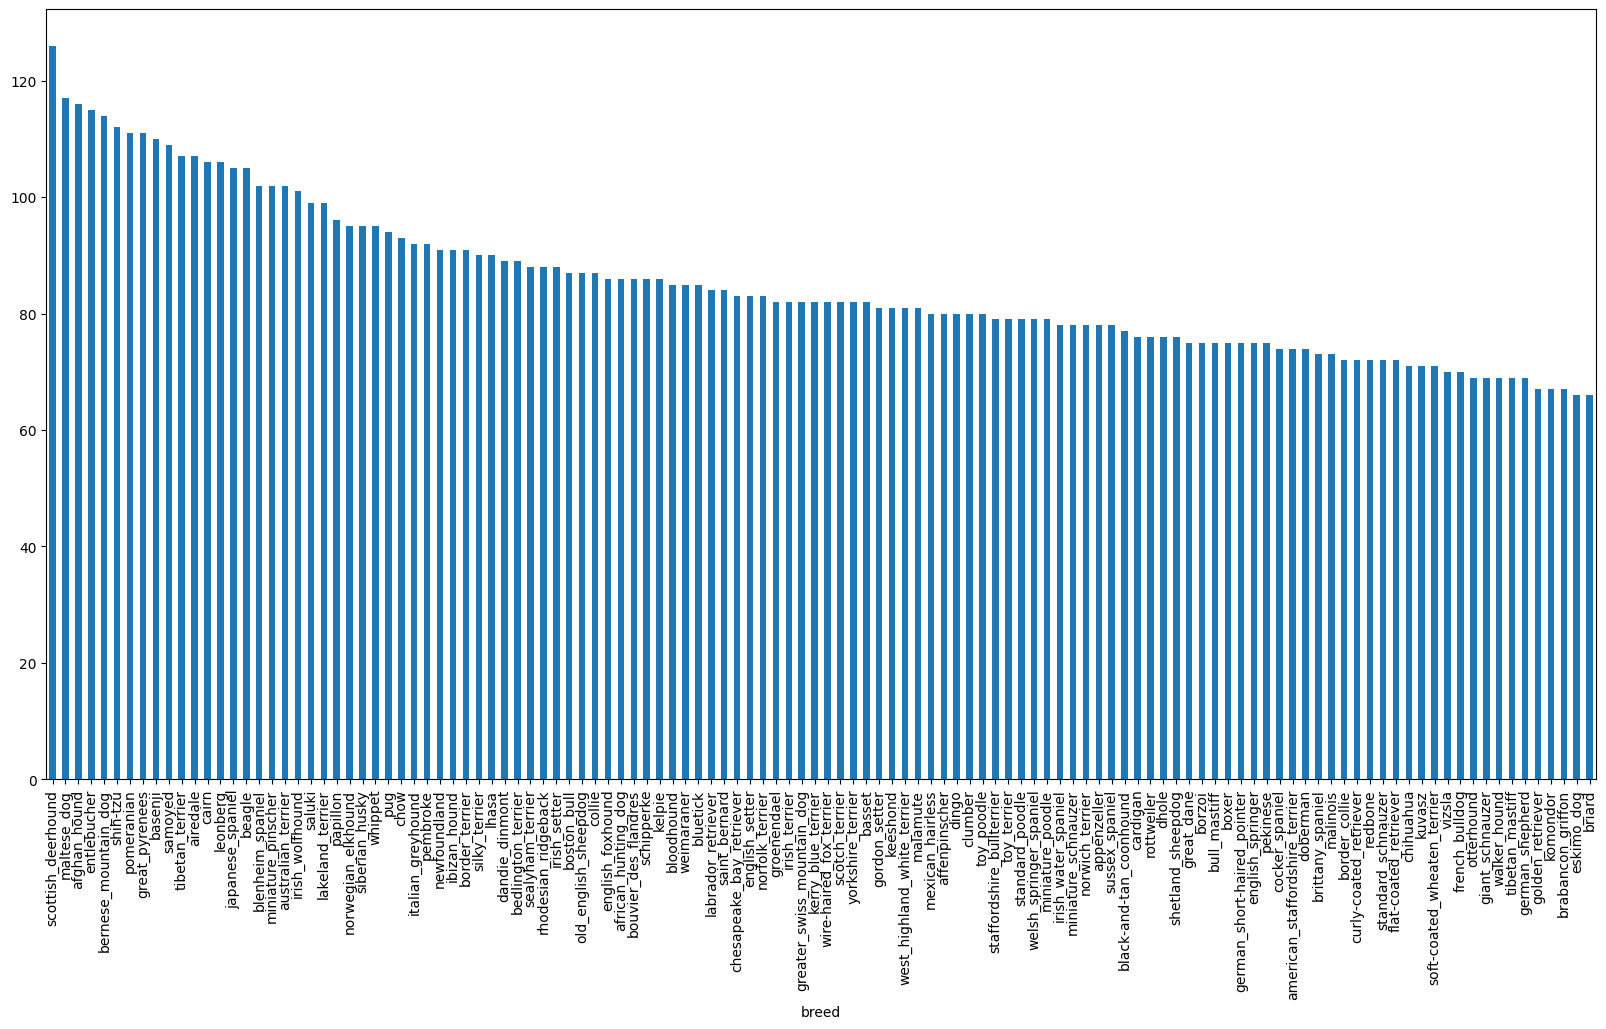

In [ ]:
# How manu images are there of each breed?

labels_csv['breed'].value_counts().plot.bar(figsize=(20,10))

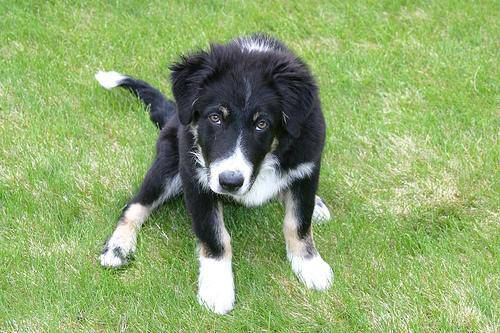

In [ ]:
#View the image

from IPython.display import Image
Image('drive/MyDrive/Dog Vision/train/032c14b2df4193004913b01ab48f87c6.jpg')

### Getting images and their labels

Lets get a list all of our image and file pathnames

In [ ]:
# Create pathname with Image IDs
filenames = ["drive/MyDrive/Dog Vision/train/" + fname + '.jpg' for fname in labels_csv['id']]
filenames[136]

'drive/MyDrive/Dog Vision/train/032c14b2df4193004913b01ab48f87c6.jpg'

In [ ]:
# Check if number of files in the train folder is the same len as filenames
import os

if len(os.listdir('drive/MyDrive/Dog Vision/train/')) == len(filenames):
  print('Number of files in train folder is equal to number of filenames')
else:
  print('Number of files in train folder is not equal to number of filenames')


Number of files in train folder is equal to number of filenames


In [ ]:
#Test

Image(filenames[9000])

NameError: name 'Image' is not defined

In [ ]:
labels_csv['breed'][38]

'boston_bull'

Since we've now got our training image filepaths in a list, let's prepare our labels

In [ ]:
import numpy as np
labels = np.array(labels_csv['breed'])
labels


array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
unique_breeds[19]

NameError: name 'unique_breeds' is not defined

In [ ]:
# see if number of labels matches the number of filenames
import os

if len(os.listdir('drive/MyDrive/Dog Vision/train/')) == len(labels):
  print('Number of Labels in train folder is equal to number of filenames')
else:
  print('Number of labels in train folder is not equal to number of filenames')

Number of Labels in train folder is equal to number of filenames


In [ ]:
# Find the unieuq label values

unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# Example: Turning boolean array into integers

print(labels[0]) # label
print(np.where(unique_breeds == labels[0])) # index where label accounts
print(boolean_labels[0].argmax()) # index where labels occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

### Creating our own validation set


In [ ]:
# Setup x and y

x= filenames
y= boolean_labels


We're going to start off experimenting with ~1000 images and increase as needed

In [ ]:
# set number of images to use for experimenting

NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [ ]:
# Let's split our data into train and validation sets

from sklearn.model_selection import train_test_split

#Split them into training and validation of total size NUM_IMAGES
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                    y[:NUM_IMAGES],
                                                    test_size=0.2,
                                                    random_state=42)

len(x_train), len(x_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [ ]:
x_train[:2], y_train[:2]

(['drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fal

## Preprocessing Images (Turning images into Tensors)

To preprocess our images into tensors we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` into Tensors
4. Normalize our image (convert color channel values from 0-255 to 0-1)
5. Resize the `image` to be a shape of (224,224)
6. Return the modified `image`

In [ ]:
# Convert image to Numpy array

from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, image
3. Turn our image into Tensors
4. Resize the image to be a shape of (224,224)
5. Return the modified image

In [ ]:
# Define Image Size
IMG_SIZE  = 224

#Create a function for preprocessing image

def process_images(image_path, IMG_SIZE=224):
  '''
  Takes an image file path and turns it into a Tensor.
  '''
  # Rand in an image file
  image = tf.io.read_file(image_path)

  #Turn the jpeg image into Numerical Tensor with 3 colours channels (red, green, blue)
  image = tf.image.decode_jpeg(image, channels=3)

  #Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  #Resize the image to our desired size (224,22)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image


## Turning our data into batches

Let's say you're to process 10,000+ images in one go .... they all might not fit into memory.

That's why we do 32 (this is the batch - can be manually adjusted) images at a time

We need our data in the form of Tensor tuples:
`(image,label)`

In [ ]:
# Create a funtion to return a tuple

def get_image_label(image_path, label):
  '''
  Takes an image file path name and the associated label,
  processed the image and return a tuple
  '''
  image = process_images(image_path)
  return image, label


In [ ]:
(process_images(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Create a funtion to turn all data into (x&y) batches

In [ ]:
# Define the batch size , 32 is good start

BATCH_SIZE = 32

# Create a function to turn data into batches

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  '''
  Creates batches of data out of image (x) and label (y) pairs
  Shuffles the data id it's training data but doesnt if it's validation data.
  Also accepts test data as input (no labels)
  '''

  # if the data is a test dataset, we probably don't have labels
  if test_data:
    print("creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) #ony filepaths
    data_batch = data.map(process_images).batch(BATCH_SIZE)
    return data_batch

  #If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("creating valid data batch")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), #Filepath
                                               tf.constant(y))) #Label
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print('Creating training data batches....')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    #Shuffle pathnames and labels before mapping image processor function
    data = data.shuffle(buffer_size=len(x))
    #Create (image,label) tuples
    data = data.map(get_image_label)
    #Turn tthe training data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch


In [ ]:
train_data = create_data_batches(x_train,y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches....
creating valid data batch


In [ ]:
#Check out the different attibutes of our data batches

train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Data Batches are best learned by visualizing, they are hard to comprehend with out visual help

In [ ]:
import matplotlib.pyplot as plt

#Create a funtion for viewing images in a data batch

def show_25_image(images, labels):
  '''
  Displays a plot of 25 images and their labels from a data batch
  '''
  plt.figure(figsize=(10,10))
  #Loop through 25 for displaying
  for i in range(25):
    # Create subplts(5 rows, 5 columns)
    ax= plt.subplot(5,5, i+1)
    # Display an image
    plt.imshow(images[i])
    #Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    #Turn the grid lines 0ff
    plt.axis('off')


In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())
len(val_images), len(val_labels)

(32, 32)

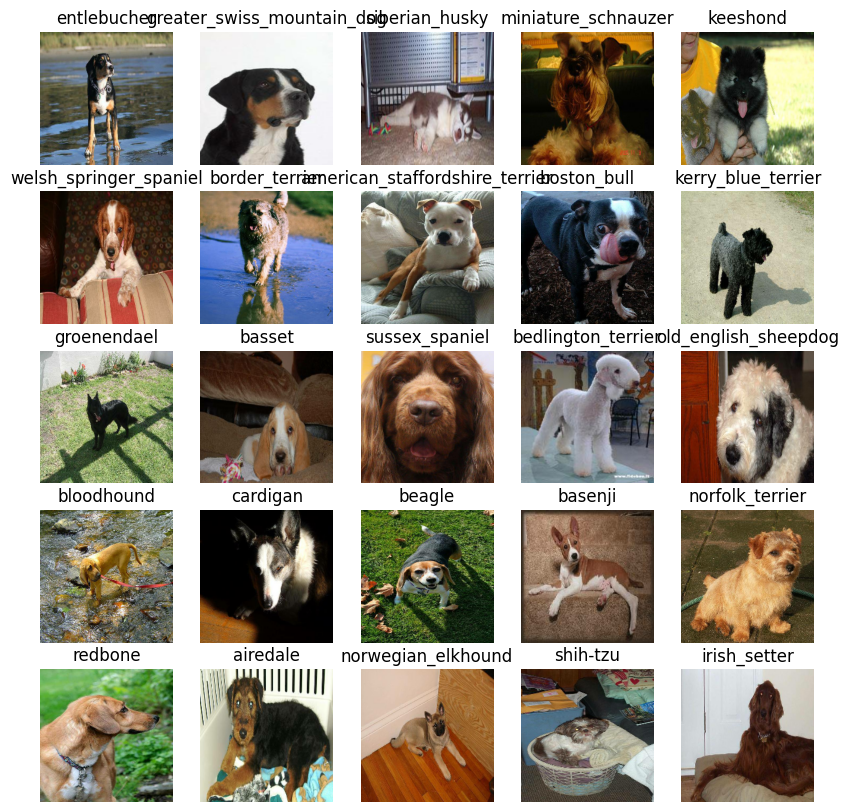

In [ ]:
# Now visualize the data in a training batch

show_25_image(train_images,train_labels)

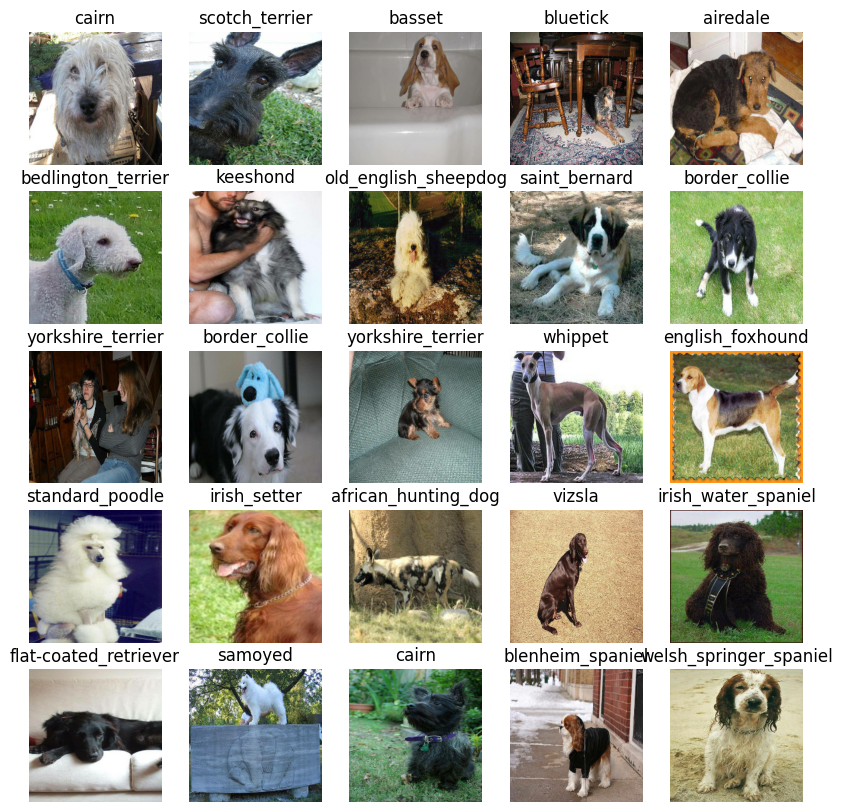

In [ ]:
show_25_image(val_images,val_labels)

## Building a model

* The input shape (image shape in the form of tensors)
* The output shape (image label in the form of tensors)
* The URL of the model we want to use

In [ ]:
# Setup input shape to the model

INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE,3] # Batch, Height, Width, colour channels
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFLow hub
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/tensorFlow2/130-224-classification"

Now we've got our inputs, outputs and model. Putting them together into a Keras deep learning model!

Funtion requirments:
* Accepts Input shape, Output shape, and the model URL
* Defines the layers in a Keras model in sequential fashion(linear step by step process)
* Compiles the model (evaluated and improved)
* Builds the model(input shape)
* Returns the model

All of these steps can be found on tensorflow documentation

In [ ]:
# Create a function which builds a Keras model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print('Building model with: ',model_url )

  # Setup the model layers
  model = tf.keras.Sequential([hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2"),
                               tf.keras.layers.Dense(output_shape,activation='softmax')
                               ])
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with:  https://www.kaggle.com/models/google/mobilenet-v2/tensorFlow2/130-224-classification
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [ ]:
outputs = np.ones(shape=(1,1,1280))
outputs

array([[[1., 1., 1., ..., 1., 1., 1.]]])

In [ ]:
%load_ext tensorboard

In [ ]:
import datetime

def create_tensorboard_callback():
  log_dir = os.path.join("drive/MyDrive/Dog Vision/logs",
                         datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(log_dir)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

Training a model of 1000

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

Creating a funtion to training the model
* Create a model using `create_model`
* Set up tensor callback
* call the fit funtion with training/valid data and NUM_EPOCHS
* Return the model

In [ ]:
def train_model():
  '''
  Trains a given model and returns the trained version
  '''
  #Create a model
  model = create_model()

  #Create new Tensorboard session
  tensorboard = create_tensorboard_callback()

  # Fit the model to the dataq passing it the callbacks
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks= [tensorboard, early_stopping])

  return model

In [ ]:
# Fit the model to the data

model = train_model()

Building model with:  https://www.kaggle.com/models/google/mobilenet-v2/tensorFlow2/130-224-classification
Epoch 1/100


KeyboardInterrupt: 

### Checking the TensorBoard Logs


Tensor board magic funtion (`%tensorboard), will access the logs directory and visualize the contents



In [ ]:
%tensorboard --logdir drive/MyDrive/Dog\ Vision/logs

## Making and evaluating predictions using a trained model

In [ ]:
# Make predictions on the validation data (not used to train on)

predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 45s 7s/step


array([[0.0103504 , 0.00100669, 0.01776715, ..., 0.01053293, 0.04659585,
        0.01123154],
       [0.00022854, 0.02282313, 0.00040021, ..., 0.00086531, 0.01073266,
        0.02887833],
       [0.00063494, 0.00484333, 0.00162532, ..., 0.00055361, 0.00352847,
        0.00572882],
       ...,
       [0.01054046, 0.00150833, 0.00985838, ..., 0.0039933 , 0.00078297,
        0.00866823],
       [0.06006019, 0.00860177, 0.00209537, ..., 0.01041332, 0.01647449,
        0.00788705],
       [0.00930415, 0.00838126, 0.00232111, ..., 0.00720295, 0.00539915,
        0.00510707]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
# First predictioni
index= 81
print(predictions[index])
print(f'Max Value (probability): {np.max(predictions[index])}')
print(f'Sum : {np.sum(predictions[index])}')
print(f'Max Index: {np.argmax(predictions[index])}')
print(f'Predictions Label: {unique_breeds[np.argmax(predictions[index])]}')


[4.16409821e-05 6.63936080e-05 2.50588986e-03 9.08441216e-05
 9.88654065e-05 5.62137924e-03 2.50681129e-04 4.44871839e-05
 9.96853039e-03 2.00744392e-03 7.04975857e-04 2.83183501e-04
 2.22661867e-04 9.05174937e-04 7.51421507e-03 1.05960993e-03
 4.91060782e-03 1.46713788e-02 1.01125188e-01 8.23012274e-03
 8.20842758e-03 8.44959068e-05 1.71299977e-03 2.16031610e-03
 4.40456579e-03 1.59555057e-04 4.09576437e-03 5.68029529e-04
 2.58273464e-02 3.22978944e-03 4.60872718e-04 1.54585345e-02
 7.26901693e-04 2.70001939e-03 3.93286115e-03 2.41034126e-04
 1.55530823e-03 4.54819063e-03 1.02644181e-03 6.67993590e-05
 2.34566326e-03 4.55311919e-03 3.32431868e-04 1.21338759e-04
 1.09876960e-03 9.14301083e-04 1.40373446e-02 6.61139609e-04
 4.05425625e-03 1.40391057e-03 1.87944606e-05 1.02868195e-04
 1.55123381e-03 1.93140924e-03 2.08200957e-03 2.64398218e-03
 2.79188273e-03 1.56881299e-03 9.33352299e-03 1.00121903e-03
 1.17182091e-03 4.00147680e-03 2.08687335e-02 1.34559888e-02
 7.71361738e-05 2.196907

Now we want to do it at scale
also see the image the prediction is being made on

In [ ]:
# Turn prediction probabilities into their respective label
def get_pred_label(prediction_probabilities):
  '''
  Turns an array of prediction probabilities into a label
  '''
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[81])
pred_label

'norfolk_terrier'

Validation is currently in a batch dataset, we have unbatchify it, then cmake predictions on the validation images, then compare to the prediction value to actual

In [ ]:
# Create a funtion to unbatch dataset



#Loop through unbatches data
def unbatch(data):
  '''
  Takes a batch data if image and label and returns seperate arrays of images and lables
  '''
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

#Unbatify the validation data

val_images, val_labels = unbatch(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

We have
* Prediction labels
* Validation Labels
* Validation Images

Make funtions to visualize the top data
* Array of prediction probbilities, an array of truth labels, array of images and integers
* Convert the prediction probabilities to a predicted label
* Plot the predicted label, it predicted porbability and the truth label and the target image

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  '''
  View the prediction, ground truth
  '''
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  #Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  #Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  #Change plt title to be predicted, probability of prediction and truth label
  plt.title('{} {:2.0f}% {}'.format(pred_label,np.max(pred_prob)*100,true_label),color=color)

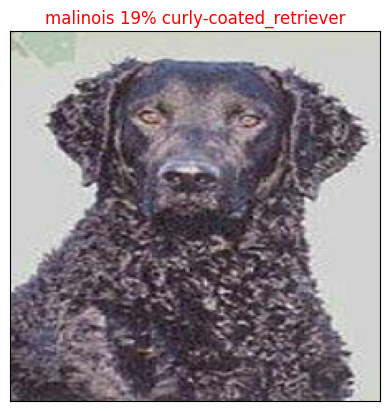

In [ ]:
plot_pred(prediction_probabilities=predictions,labels=val_labels, images=val_images, n=76)

Visualize the top 10 predictions:
* Take an input og prediction probabilites array and a ground truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
* PLot the top 10 prediction probability values and labels, coloring the true label green

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  '''
  Plot the top 10 highest prediction confidences along with the truth label for sample n
  '''

  pred_prob, true_label = prediction_probabilities[n], labels[n]

  #Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 predictions labels
  top_10_pred_lables = unique_breeds[top_10_pred_indexes]

  #Setup Plot
  top_plot = plt.bar(np.arange(len(top_10_pred_lables)),
                      top_10_pred_values,
                      color='grey')
  plt.xticks(np.arange(len(top_10_pred_lables)), labels=top_10_pred_lables, rotation='vertical')

  #Change color of trye label

  if np.isin(true_label, top_10_pred_lables):
    top_plot[np.argmax(top_10_pred_lables == true_label)].set_color('green')
  else:
    pass

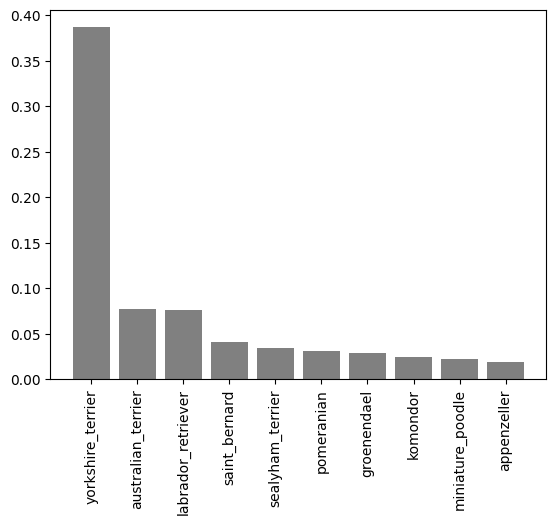

In [ ]:
plot_pred_conf(prediction_probabilities=predictions, labels=val_labels, n=100)

In [ ]:
predictions[0].argsort()[-10:][::-1]

array([ 64,  38,  52,  49, 112, 118,  59,  19, 109, 104])

In [ ]:
predictions[0].max()

0.10109462

Check out a few rather than 1

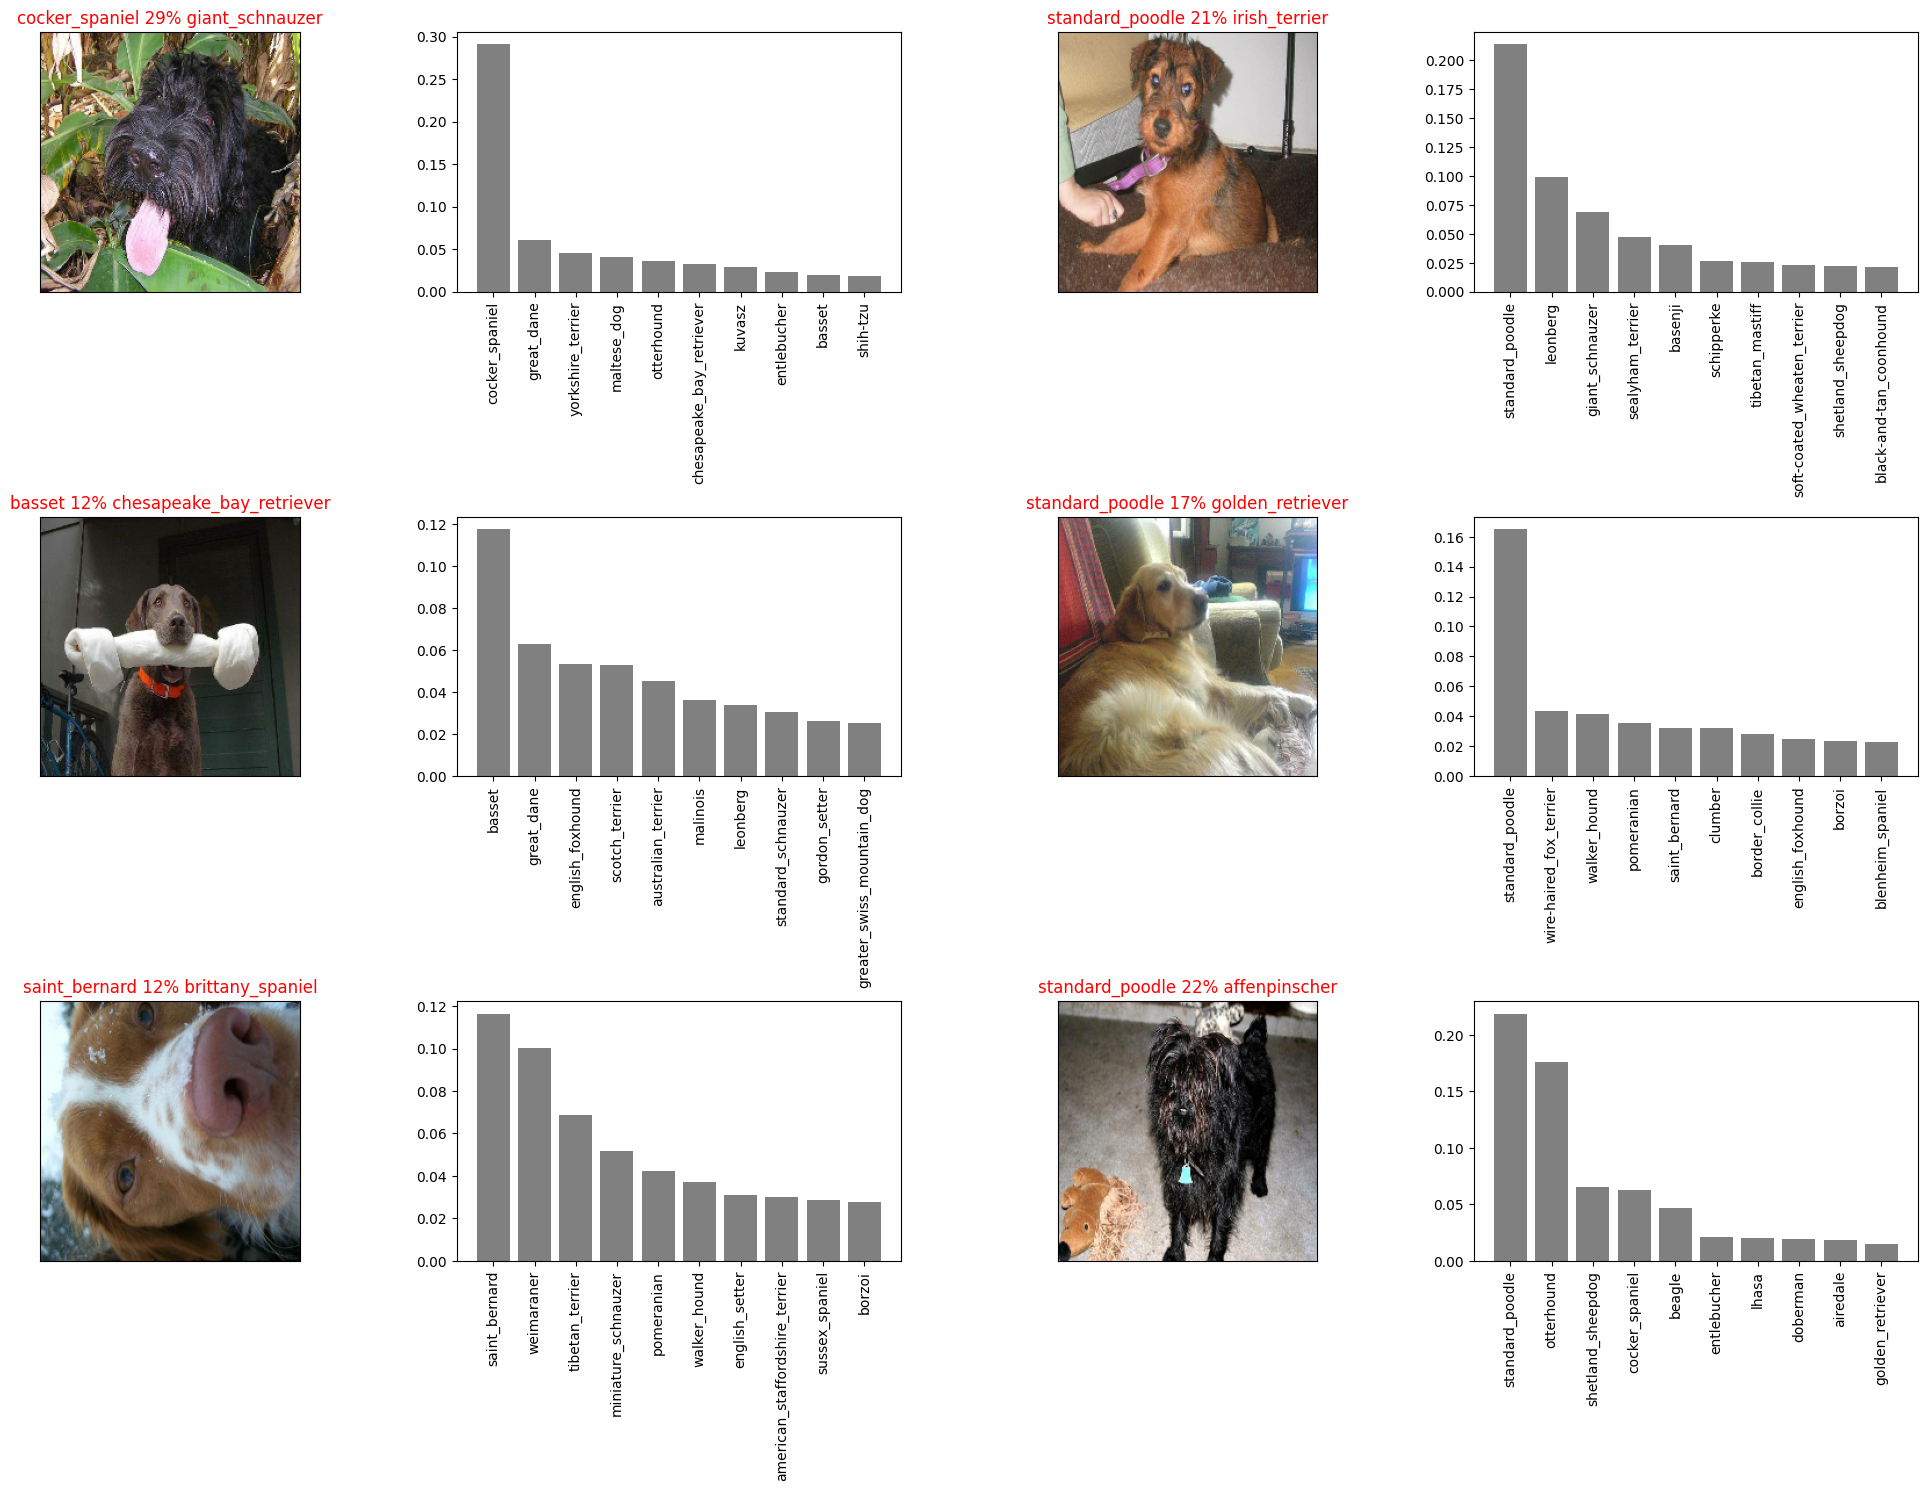

In [ ]:
i_multiplier = 135
num_rows= 3
num_cols = 2
num_images = num_rows * num_cols

plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities= predictions, labels=val_labels, images=val_images, n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities= predictions, labels=val_labels, n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

## saving and reloading a trained model


In [ ]:
# Create a funtion to a save a model

def save_model(model, suffix=None):
  '''
  Save a given model in a model directory and appends a suffix (string)
  '''
  #Create a model directory with current time
  modeldir= os.path.join("/drive/MyDrive/Dog Vision/models",datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

  model_path = modeldir + '-' + suffix + '.h5' #Save format of the model
  print(f'Saving model to:{model_path}...')
  model.save(model_path)
  return model_path

In [ ]:
# Create a funtion to load a trained model

def load_model(model_path):
  '''
  Loads a saved model from a specified path
  '''
  print(f'Loading save model from: {model_path}')
  model = tf.keras.models.load_model(model_path, custom_objects={'KerasLayer':hub.KerasLayer})

  return model

In [ ]:
# Save our model trained on 1000 images

save_model(model, suffix='1000-images-mobilenetv2-Adam')

Saving model to:/drive/MyDrive/Dog Vision/models/20240717-000713-1000-images-mobilenetv2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'/drive/MyDrive/Dog Vision/models/20240717-000713-1000-images-mobilenetv2-Adam.h5'

In [ ]:
#Load a trained model

loaded_1000_image_model = load_model('/drive/MyDrive/Dog Vision/models/20240717-000713-1000-images-mobilenetv2-Adam.h5')

Loading save model from: /drive/MyDrive/Dog Vision/models/20240717-000713-1000-images-mobilenetv2-Adam.h5


In [ ]:
# Evaluate the pre-saved model

model.evaluate(val_data)

7/7 [==============================] - 1s 148ms/step - loss: 1.3541 - accuracy: 0.6550


[1.354149580001831, 0.6549999713897705]

In [ ]:
#Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 2s 167ms/step - loss: 1.3541 - accuracy: 0.6550


[1.354149580001831, 0.6549999713897705]

## Training a big dog model on the full data

In [ ]:
len(x), len(y)

(10222, 10222)

In [ ]:
len(x_train)

800

In [ ]:
# Create a data batch with the full data set

full_data = create_data_batches(x,y)

Creating training data batches....


In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Create a model for full model
full_model = create_model()

Building model with:  https://www.kaggle.com/models/google/mobilenet-v2/tensorFlow2/130-224-classification


In [ ]:
#Create full model callbacks

full_model_tensorbard = create_tensorboard_callback()

# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=3)


Note: Running the cell will take 30 mins because GPU has to load all of the images into memory

In [ ]:
#Fit the full model to the full data

full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 2507s 8s/step - loss: 1.3459 - accuracy: 0.6656
Epoch 2/100
320/320 [==============================] - 43s 134ms/step - loss: 0.4046 - accuracy: 0.8788
Epoch 3/100
320/320 [==============================] - 45s 140ms/step - loss: 0.2373 - accuracy: 0.9358
Epoch 4/100
320/320 [==============================] - 45s 141ms/step - loss: 0.1517 - accuracy: 0.9631
Epoch 5/100
320/320 [==============================] - 43s 133ms/step - loss: 0.1053 - accuracy: 0.9792
Epoch 6/100
320/320 [==============================] - 44s 138ms/step - loss: 0.0749 - accuracy: 0.9876
Epoch 7/100
320/320 [==============================] - 44s 137ms/step - loss: 0.0593 - accuracy: 0.9915
Epoch 8/100
320/320 [==============================] - 43s 134ms/step - loss: 0.0452 - accuracy: 0.9943
Epoch 9/100
320/320 [==============================] - 45s 140ms/step - loss: 0.0374 - accuracy: 0.9962
Epoch 10/100
320/320 [==============================] - 45s 140ms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
save_model(full_model, suffix='full-image-set-mobilenetv2-Adam')

Saving model to:/drive/MyDrive/Dog Vision/models/20240718-183245-full-image-set-mobilenetv2-Adam.h5...


'/drive/MyDrive/Dog Vision/models/20240718-183245-full-image-set-mobilenetv2-Adam.h5'

In [ ]:
loaded_image_model = load_model('/drive/MyDrive/Dog Vision/models/20240718-183245-full-image-set-mobilenetv2-Adam.h5')

Loading save model from: /drive/MyDrive/Dog Vision/models/20240718-183245-full-image-set-mobilenetv2-Adam.h5


## Making predictions on the test data
To make predictions on the test data, we will have to convert the test data into batchses

Funtion already created `create_data_batches()`

To Make predictions:
* Get the test image filenames
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (does not have labels)
* Make a predictions array by passing the test batches to the `predict()` method


In [ ]:
#Load image file names
test_path = 'drive/MyDrive/Dog Vision/test/'
test_filenames= [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/Dog Vision/test/e519e383a6efec0abd285beda04aeac9.jpg',
 'drive/MyDrive/Dog Vision/test/e4897fe96990006c10ec7336772cbd37.jpg',
 'drive/MyDrive/Dog Vision/test/dffba3aed600801a5f91c5034bec5b08.jpg',
 'drive/MyDrive/Dog Vision/test/e330d9cfe81e42338ddbf8a121930e83.jpg',
 'drive/MyDrive/Dog Vision/test/e66a91249a4979a86db48e5c64b81a88.jpg',
 'drive/MyDrive/Dog Vision/test/dfefaa03faeab447d6b48e7367255b43.jpg',
 'drive/MyDrive/Dog Vision/test/e30a97eb637239e3b15c903529e04800.jpg',
 'drive/MyDrive/Dog Vision/test/e16c4485a37ac90e1623e2da77513648.jpg',
 'drive/MyDrive/Dog Vision/test/ddc0134def0da0472e55271da8b57c44.jpg',
 'drive/MyDrive/Dog Vision/test/e514f86170698394e20f0cd1af968451.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:
#Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

creating test data batches...


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

Calling predicts on our full model and passing it test will take a lone time (about an hour)

In [ ]:
# Make Predictions on test data batch using the all train data

test_predictions =loaded_1000_image_model.predict(test_data, verbose=1)

324/324 [==============================] - 3754s 12s/step


In [ ]:
np.savetxt("drive/MyDrive/Dog Vision/preds_array.csv", test_predictions, delimiter=",")

In [ ]:
test_predictions = np.loadtxt("drive/MyDrive/Dog Vision/preds_array.csv", delimiter=",")

## Making preditions on custom images
* Get the filepaths of our images
* Turn the filepaths into data batches using `create_data_batches()'
* pass the custom images  to our model predict method
* Convedrt the prediction output probabilities to predictions labels
Compare the predicted labels to the custom images

In [ ]:
# Get custom image filepaths

# Get custom image filepaths
import os

custom_path= "drive/MyDrive/Dog Vision/gf_dog_2/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path) if not fname.startswith('.')] # Ignore files/directories starting with '.'

In [ ]:
custom_image_paths

['drive/MyDrive/Dog Vision/gf_dog_2/Image from iOS (3).jpg',
 'drive/MyDrive/Dog Vision/gf_dog_2/Image from iOS (2).jpg',
 'drive/MyDrive/Dog Vision/gf_dog_2/Image from iOS (1).jpg']

In [ ]:
#Turn custom images into batch datasets

custom_data= create_data_batches(custom_image_paths, test_data=True)
custom_data

creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
#Make Predictions on the custom data

custom_preds = loaded_image_model.predict(custom_data)

FailedPreconditionError: Graph execution error:

Detected at node ReadFile defined at (most recent call last):
<stack traces unavailable>
Detected at node ReadFile defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) FAILED_PRECONDITION:  drive/MyDrive/Dog Vision/gf_dog_2/.ipynb_checkpoints; Is a directory
	 [[{{node ReadFile}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
  (1) FAILED_PRECONDITION:  drive/MyDrive/Dog Vision/gf_dog_2/.ipynb_checkpoints; Is a directory
	 [[{{node ReadFile}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_predict_function_86570]

In [ ]:
# Get custom image filepaths

custom_path= "drive/MyDrive/Dog Vision/gf_dog_2/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path) if not fname.startswith('.')] # Ignore files/directories starting with '.'

# ... (rest of your code)

#Turn custom images into batch datasets

custom_data= create_data_batches(custom_image_paths, test_data=True)
custom_data

# ... (rest of your code)

#Make Predictions on the custom data

custom_preds = loaded_image_model.predict(custom_data)

creating test data batches...
1/1 [==============================] - 1s 720ms/step


In [ ]:
custom_preds

array([[2.13567673e-05, 1.80749584e-08, 3.09429780e-08, 5.01879526e-07,
        1.21513125e-07, 2.55673438e-08, 7.46842943e-06, 2.03846383e-07,
        1.93032042e-06, 9.32241346e-06, 1.55719117e-05, 1.88884485e-07,
        8.94883385e-08, 6.27704878e-07, 6.65866153e-08, 1.51085771e-06,
        4.99473884e-09, 1.43209205e-03, 1.01262376e-09, 1.07529574e-09,
        4.52460869e-09, 5.68911162e-07, 2.88320177e-08, 2.16057724e-05,
        7.95699577e-08, 2.03827631e-06, 8.59521270e-01, 1.44459156e-09,
        4.14834767e-06, 1.87941154e-07, 1.50933616e-07, 3.67749199e-05,
        1.50056110e-07, 2.18047158e-09, 5.93519608e-11, 3.58863105e-03,
        3.22035731e-10, 8.64248118e-11, 3.57608720e-09, 7.29809813e-09,
        2.27910232e-06, 5.68191638e-07, 6.64210464e-09, 1.00346363e-10,
        5.18231928e-08, 1.36404692e-08, 1.75805113e-08, 2.87173265e-07,
        7.29800433e-08, 3.30461808e-06, 1.06261810e-09, 1.06949393e-07,
        7.14759926e-06, 1.16628276e-10, 9.71060558e-12, 6.224642

In [ ]:
custom_preds.shape

(12, 120)

In [ ]:
#Get Custom Image label

custom_pred_label = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_label

['border_terrier',
 'bluetick',
 'border_collie',
 'border_collie',
 'bluetick',
 'staffordshire_bullterrier',
 'cairn',
 'pug',
 'dandie_dinmont']

In [ ]:
# Get custom images
custom_images = []

for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

In [ ]:
custom_images

[array([[[0.47950006, 0.75008833, 0.56577456],
         [0.47202384, 0.74261206, 0.55829835],
         [0.4541455 , 0.7247337 , 0.54042   ],
         ...,
         [0.5868997 , 0.68769246, 0.5362642 ],
         [0.5860228 , 0.68014044, 0.538964  ],
         [0.5803922 , 0.6745098 , 0.53333336]],
 
        [[0.4537575 , 0.72434574, 0.540032  ],
         [0.5113095 , 0.7818978 , 0.597584  ],
         [0.50510335, 0.7756916 , 0.59137785],
         ...,
         [0.5565087 , 0.6878414 , 0.5444462 ],
         [0.5623512 , 0.68391985, 0.5505865 ],
         [0.5623512 , 0.68391985, 0.5505865 ]],
 
        [[0.48211664, 0.7527049 , 0.56839114],
         [0.51929915, 0.7898874 , 0.60557365],
         [0.52882636, 0.79941463, 0.61510086],
         ...,
         [0.5372549 , 0.69411767, 0.56078434],
         [0.54509807, 0.69411767, 0.54901963],
         [0.54509807, 0.69411767, 0.54901963]],
 
        ...,
 
        [[0.02851891, 0.09126401, 0.05204833],
         [0.02139095, 0.08413605, 0.04492

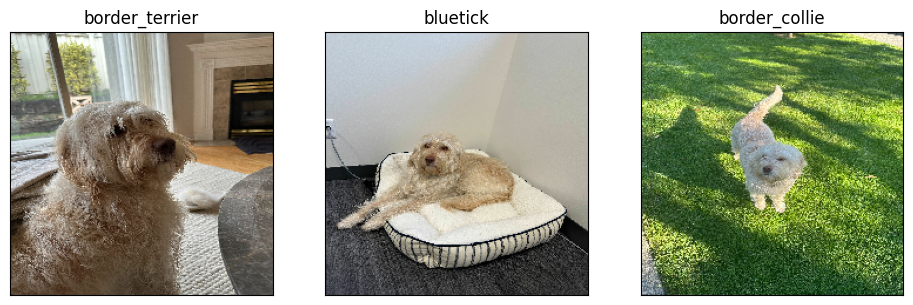

In [ ]:
#Check prediction

plt.figure(figsize=(40,20))
for i, image in enumerate(custom_images):
  plt.subplot(1,10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_label[i])
  plt.imshow(image)

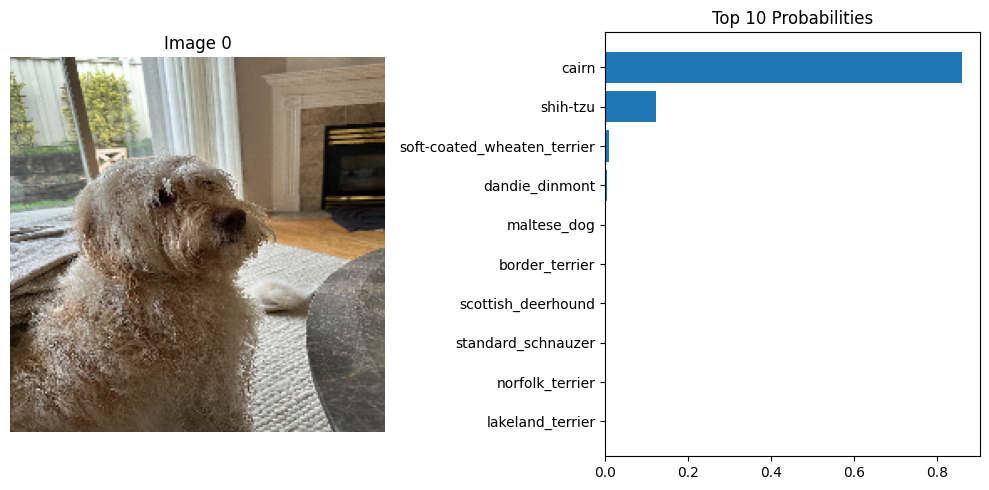

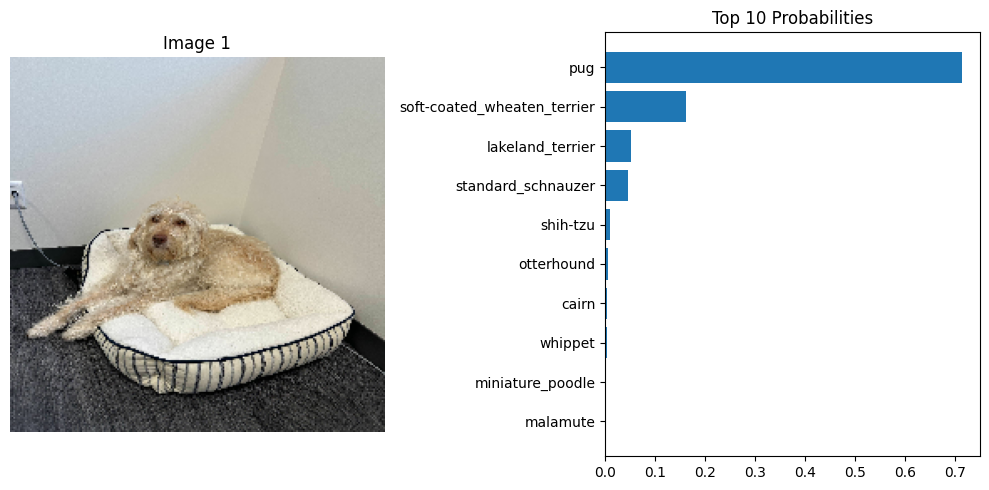

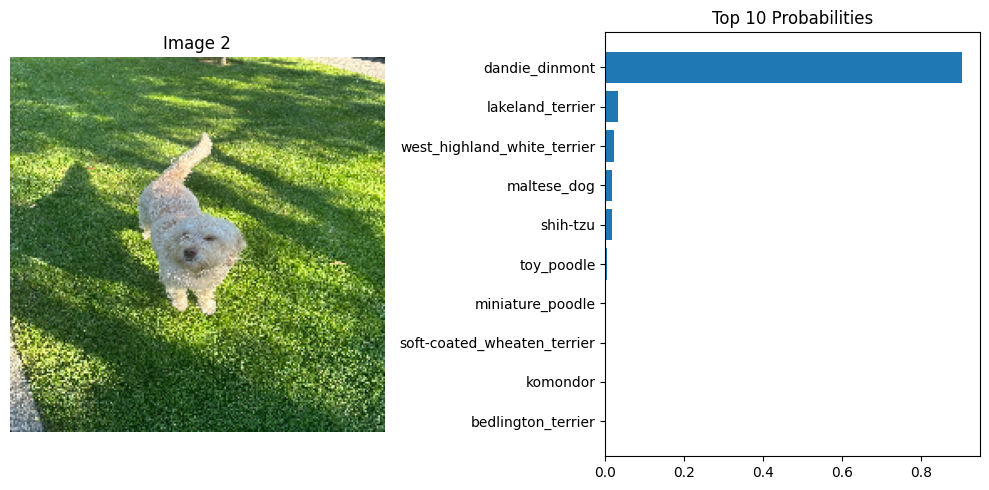

In [ ]:
# prompt: For the images in custom_image I want to show the top 10 probabilties - also output the results in jpg .

import matplotlib.pyplot as plt
import numpy as np
# Iterate through custom images and predictions
for i, (image, pred_probs) in enumerate(zip(custom_images, custom_preds)):
  # Get top 10 prediction probabilities and labels
  top_10_pred_indexes = pred_probs.argsort()[-10:][::-1]
  top_10_pred_values = pred_probs[top_10_pred_indexes]
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Plot top 10 predictions
  plt.figure(figsize=(10, 5))
  plt.bar(np.arange(len(top_10_pred_labels)), top_10_pred_values, color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)), labels=top_10_pred_labels, rotation='vertical')
  plt.title(f"Top 10 Predictions for Custom Image {i+1}")

  # Save the plot as a JPG file
  plt.savefig(f"drive/MyDrive/Dog Vision/custom_image_predictions_{i+1}.jpg")
  plt.show()


In [ ]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      